Dataset link ->
https://archive.ics.uci.edu/dataset/186/wine+quality

#EDA

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset (semicolon-separated)
df = pd.read_csv("winequality-white.csv", sep=";")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape

(4898, 12)

In [ ]:
df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Summary statistics
display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


##Univariate Analysis

/var/folders/2z/smt8nb657z36gczzb4k7jnh80000gn/T/ipykernel_7441/2321467072.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


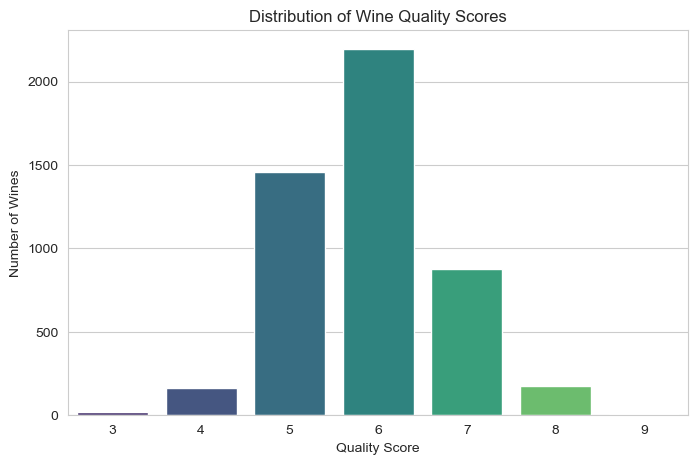

In [ ]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns


# Make the plot pretty
sns.set_style("whitegrid")

# Plot the count of each quality score
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Number of Wines')
plt.show()

In [ ]:
print(df['quality'].value_counts(normalize=True))

quality
6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: proportion, dtype: float64


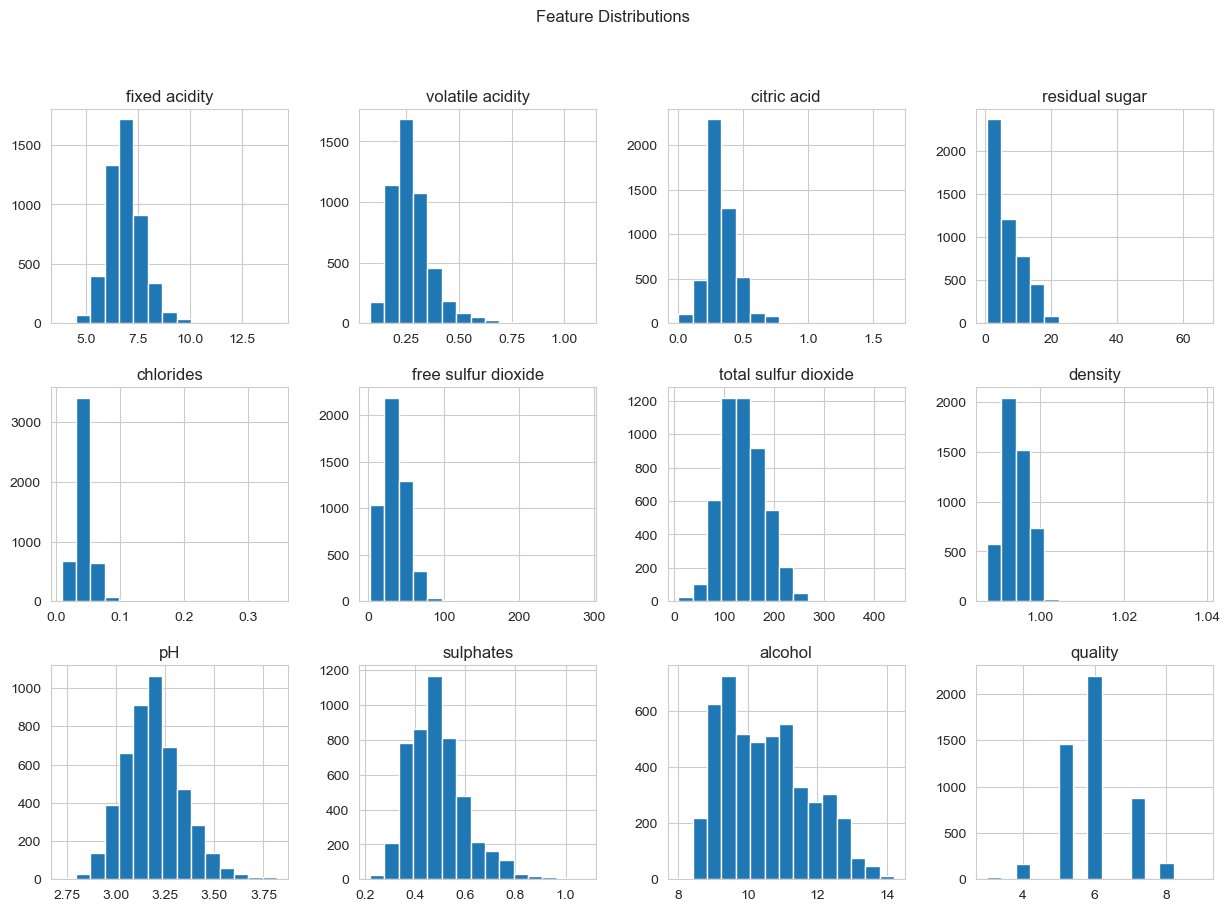

In [ ]:
# Plot histograms for all numerical columns
df.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle("Feature Distributions")
plt.show()

##Bivariate Analysis

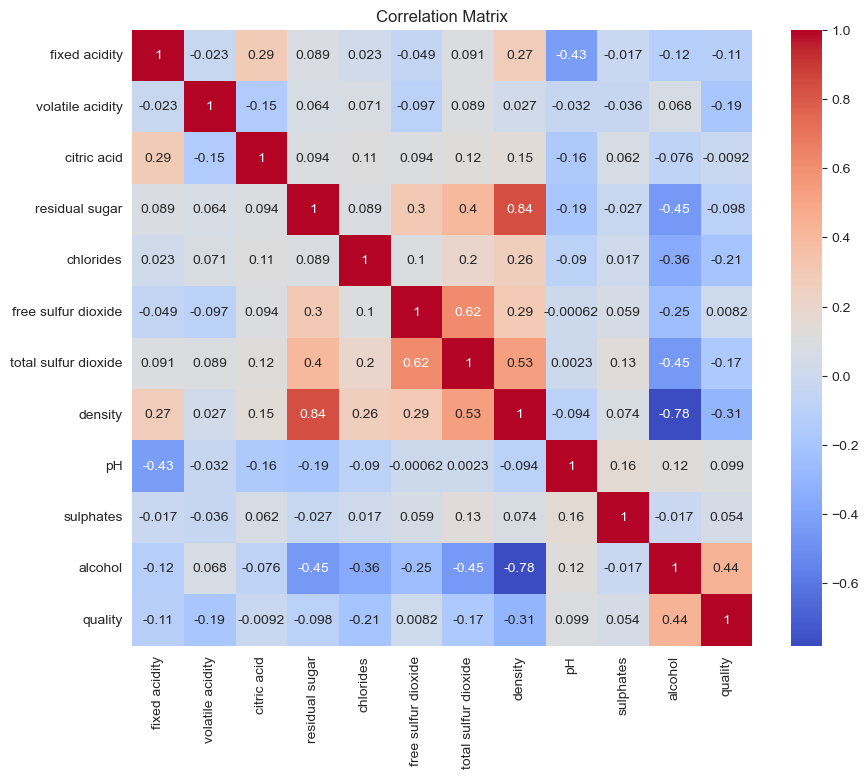

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Compute correlation matrix and store it
corr = df.corr(numeric_only=True)

# Print sorted correlations with 'quality' (descending)
print("Which features correlate most with Quality?")
print(corr['quality'].sort_values(ascending=False))


Which features correlate most with Quality?
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


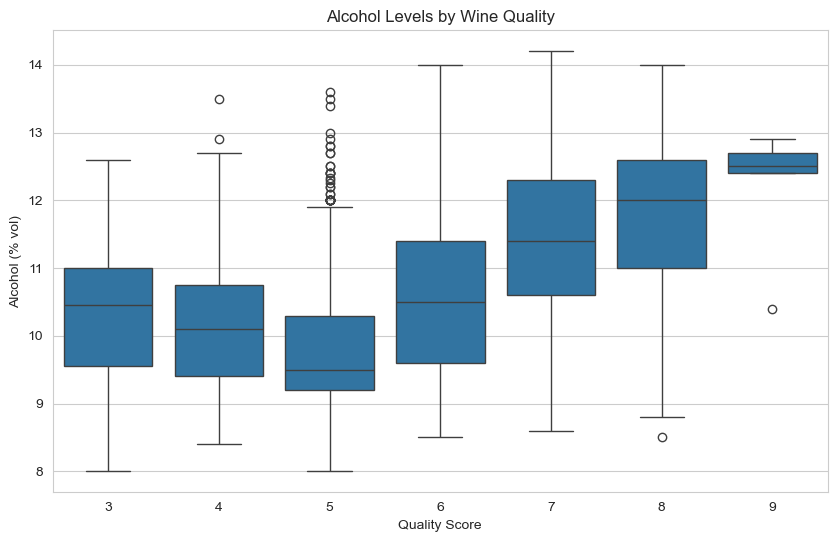

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Boxplot: Alcohol vs. Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Levels by Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol (% vol)')
plt.show()

#Pipeline

In [ ]:
# 1. Imports

!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Data
# Note: using sep=';' because we saw earlier that the CSV uses semi-colons
df = pd.read_csv('winequality-white.csv', sep=';')

# 3. Separate Features (X) and Target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# 4. Train/Test Split
# random_state=42 ensures we get the same split every time (reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape:  {X_test.shape}")

Training Data Shape: (3918, 11)
Testing Data Shape:  (980, 11)


##Step 1: Establish a Baseline

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# 1. Train the Dummy Regressor (It just calculates the mean of y_train)
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)

# 2. Predict on the Test Set
y_pred_dummy = dummy.predict(X_test)

# 3. Calculate the Baseline Error (MSE)
baseline_mse = mean_squared_error(y_test, y_pred_dummy)

print(f"Baseline MSE: {baseline_mse:.4f}")

Baseline MSE: 0.7755


##Step 2: Build the Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Create the Pipeline object
# 1. 'scaler': Standardizes features by removing the mean and scaling to unit variance
# 2. 'ridge': The linear least squares with l2 regularization
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

print("Pipeline created successfully.")

Pipeline created successfully.


##Step 3: Hyperparameter Optimization (Grid Search)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Define the values to test
# 'ridge__alpha' targets the 'alpha' parameter inside the 'ridge' step of the pipeline
param_grid = {'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# 2. Set up the Search (5-Fold Cross-Validation)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# 3. Train
grid_search.fit(X_train, y_train)

print(f"Best Alpha: {grid_search.best_params_['ridge__alpha']}")

Best Alpha: 10.0


##Step 4: Final Evaluation & Business Conclusion

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. Get the best model
best_model = grid_search.best_estimator_

# 2. Predict on Test Data
y_pred = best_model.predict(X_test)

# 3. Calculate Metrics
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

# 4. Calculate Improvement
improvement = 100 * (baseline_mse - final_mse) / baseline_mse

print(f"Ridge MSE:    {final_mse:.4f}")
print(f"R2 Score:     {final_r2:.4f}")
print(f"Improvement:  {improvement:.2f}%")

Ridge MSE:    0.5698
R2 Score:     0.2643
Improvement:  26.53%


#Explaining the Model

This graph answers the stakeholder question: "What actually makes a wine 'good' according to your model?"

/var/folders/2z/smt8nb657z36gczzb4k7jnh80000gn/T/ipykernel_7441/2565152172.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette=colors)


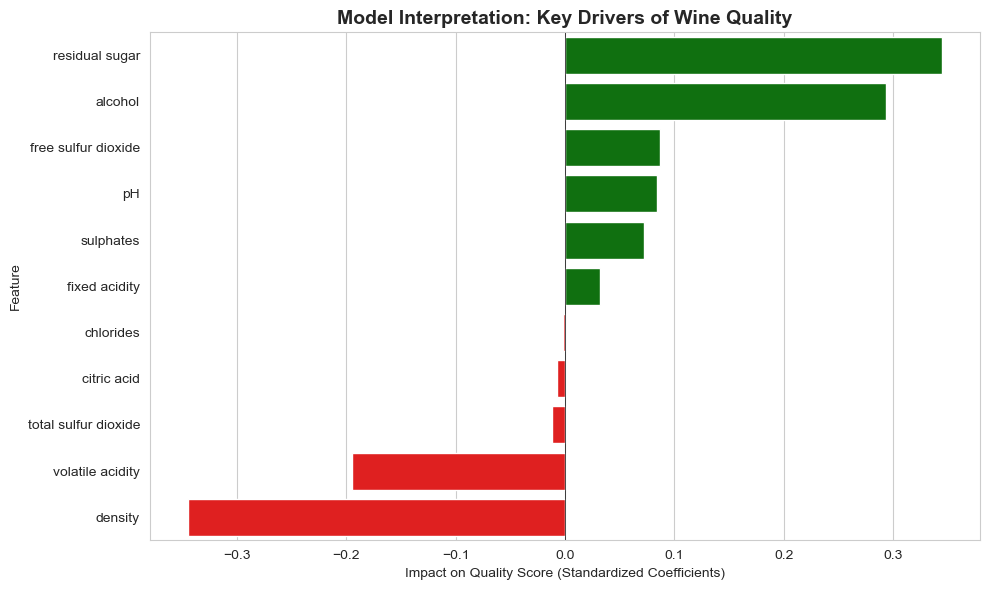

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract coefficients from the pipeline
# The 'ridge' step contains the math, but we need the feature names from X
coeffs = best_model.named_steps['ridge'].coef_
feature_names = X.columns

# 2. Organize into a DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coeffs
})
# Sort by absolute magnitude to show the most impactful ones first
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(10, 6))
# Color code: Green for positive (Good), Red for negative (Bad)
colors = ['green' if x > 0 else 'red' for x in feat_imp['Importance']]
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette=colors)

plt.title('Model Interpretation: Key Drivers of Wine Quality', fontsize=14, fontweight='bold')
plt.xlabel('Impact on Quality Score (Standardized Coefficients)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5) # Zero line for clarity
plt.tight_layout()
plt.show()

Evaluating Performance (Actual vs. Predicted)
This graph answers the question: "How accurate is the model really?"

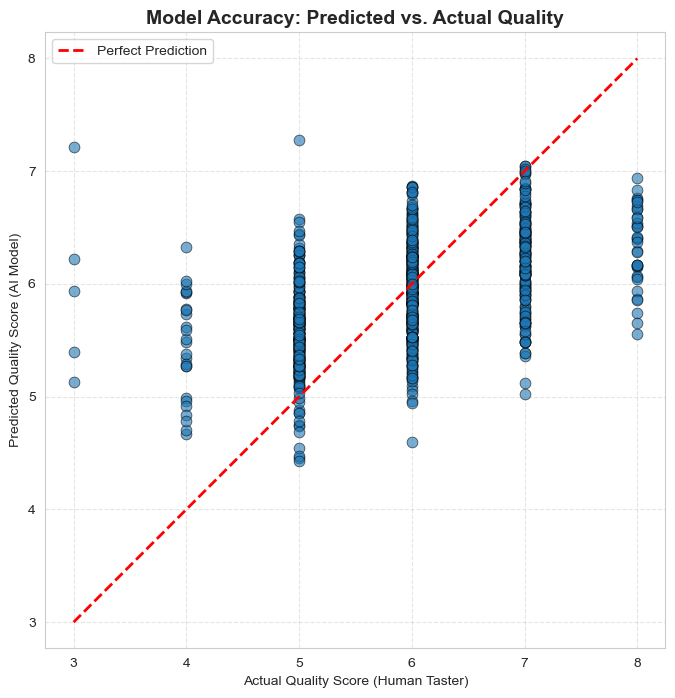

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make Predictions on the Test Set
y_pred = best_model.predict(X_test)

# 2. Plot Actual (x-axis) vs. Predicted (y-axis)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='k', s=60)

# 3. Add the "Ideal" Line (Perfect Accuracy)
# If a prediction lands on this red line, it was 100% correct
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title('Model Accuracy: Predicted vs. Actual Quality', fontsize=14, fontweight='bold')
plt.xlabel('Actual Quality Score (Human Taster)')
plt.ylabel('Predicted Quality Score (AI Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal') # Ensures the scale is visually fair
plt.show()

/var/folders/2z/smt8nb657z36gczzb4k7jnh80000gn/T/ipykernel_7441/3811802346.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette=colors, ax=ax_feat)
/var/folders/2z/smt8nb657z36gczzb4k7jnh80000gn/T/ipykernel_7441/3811802346.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis', ax=ax_dist)
/var/folders/2z/smt8nb657z36gczzb4k7jnh80000gn/T/ipykernel_7441/3811802346.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, p

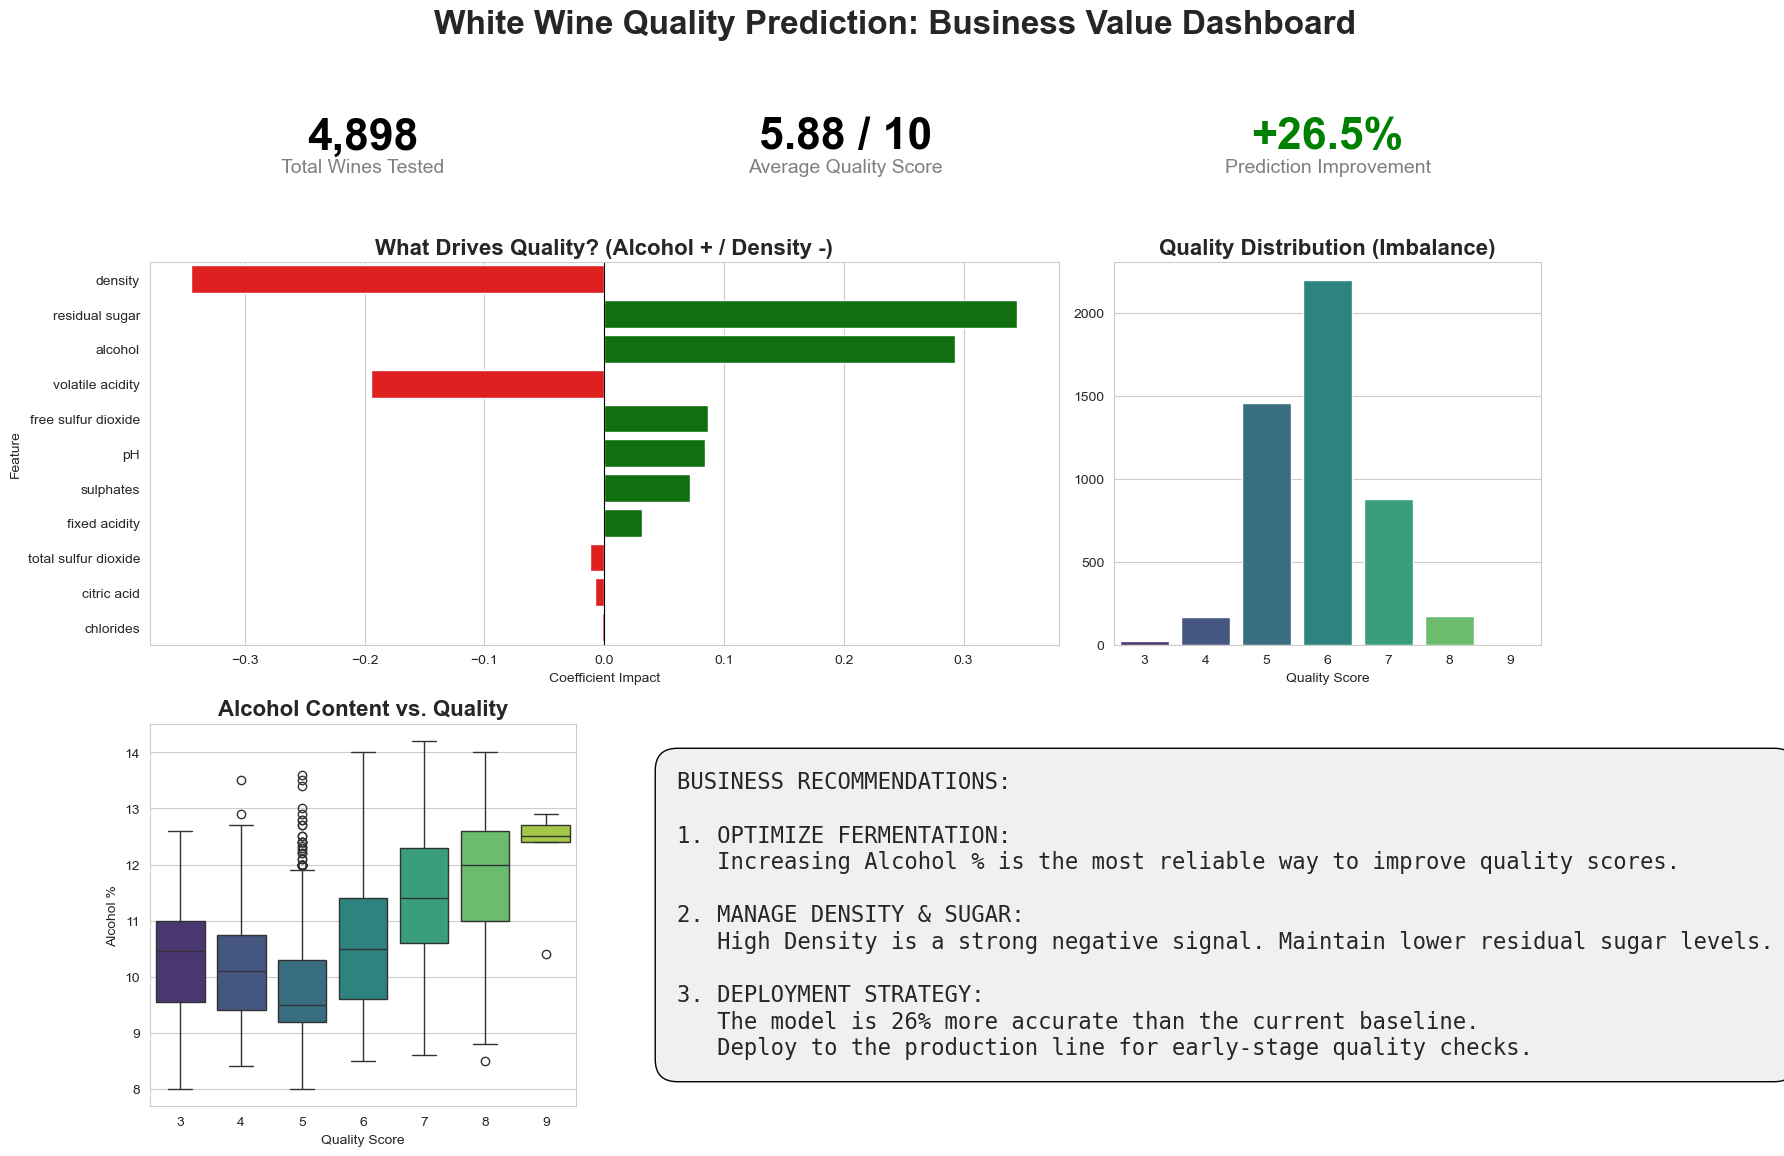

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor

# --- 1. Setup & Retrain (Ensuring we have the latest data) ---
df = pd.read_csv('winequality-white.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
base_mse = mean_squared_error(y_test, dummy.predict(X_test))

# Ridge Model
pipeline = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
grid = GridSearchCV(pipeline, {'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Metrics
final_mse = mean_squared_error(y_test, y_pred)
improvement = (base_mse - final_mse) / base_mse * 100
avg_quality = df['quality'].mean()

# Feature Importance
coeffs = best_model.named_steps['ridge'].coef_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': coeffs}).sort_values(by='Importance', key=abs, ascending=False)


# --- 2. Build the Dashboard ---
# Set up a Grid layout (3 rows, 3 columns)
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 3, figure=fig, height_ratios=[0.2, 1, 1])
plt.suptitle('White Wine Quality Prediction: Business Value Dashboard', fontsize=24, fontweight='bold', y=0.96)

# --- ROW 1: KPI METRICS ---
def draw_kpi(ax, title, value, color):
    ax.axis('off')
    ax.text(0.5, 0.6, value, ha='center', va='center', fontsize=32, fontweight='bold', color=color)
    ax.text(0.5, 0.2, title, ha='center', va='center', fontsize=14, color='gray')

ax_kpi1 = fig.add_subplot(gs[0, 0])
draw_kpi(ax_kpi1, "Total Wines Tested", f"{len(df):,}", "black")

ax_kpi2 = fig.add_subplot(gs[0, 1])
draw_kpi(ax_kpi2, "Average Quality Score", f"{avg_quality:.2f} / 10", "black")

ax_kpi3 = fig.add_subplot(gs[0, 2])
draw_kpi(ax_kpi3, "Prediction Improvement", f"+{improvement:.1f}%", "green")

# --- ROW 2: KEY DRIVERS & IMBALANCE ---
# Feature Importance Bar Chart
ax_feat = fig.add_subplot(gs[1, :2])
colors = ['green' if x > 0 else 'red' for x in feat_imp['Importance']]
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette=colors, ax=ax_feat)
ax_feat.set_title('What Drives Quality? (Alcohol + / Density -)', fontsize=16, fontweight='bold')
ax_feat.set_xlabel('Coefficient Impact')
ax_feat.axvline(0, color='black', linewidth=0.8)

# Distribution Plot
ax_dist = fig.add_subplot(gs[1, 2])
sns.countplot(x='quality', data=df, palette='viridis', ax=ax_dist)
ax_dist.set_title('Quality Distribution (Imbalance)', fontsize=16, fontweight='bold')
ax_dist.set_xlabel('Quality Score')
ax_dist.set_ylabel('')

# --- ROW 3: PROOF & RECOMMENDATIONS ---
# Alcohol Trend
ax_trend = fig.add_subplot(gs[2, 0])
sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis', ax=ax_trend)
ax_trend.set_title('Alcohol Content vs. Quality', fontsize=16, fontweight='bold')
ax_trend.set_xlabel('Quality Score')
ax_trend.set_ylabel('Alcohol %')

# Business Recommendations Text Box
ax_text = fig.add_subplot(gs[2, 1:])
ax_text.axis('off')
recs = (
    "BUSINESS RECOMMENDATIONS:\n\n"
    "1. OPTIMIZE FERMENTATION:\n"
    "   Increasing Alcohol % is the most reliable way to improve quality scores.\n\n"
    "2. MANAGE DENSITY & SUGAR:\n"
    "   High Density is a strong negative signal. Maintain lower residual sugar levels.\n\n"
    "3. DEPLOYMENT STRATEGY:\n"
    "   The model is 26% more accurate than the current baseline.\n"
    "   Deploy to the production line for early-stage quality checks."
)
ax_text.text(0.05, 0.5, recs, va='center', fontsize=16, fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=1", facecolor="#f0f0f0", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 1, 0.93]) # Adjust for main title
plt.show()